## Business Understanding (CRISP-DM)

### Objective
The primary objective of this project is to analyze transaction data from an online retail store to gain insights into customer purchasing behavior, product performance, and sales trends. The analysis will help in identifying patterns that can inform business strategies, such as inventory management, marketing campaigns, and customer segmentation.

### Business Questions
1. **Customer Segmentation:** Who are the most valuable customers based on their purchasing behavior?
2. **Sales Trends:** What are the trends in sales over time, including peak sales periods and seasonal variations?
3. **Product Performance:** Which products are the bestsellers, and which ones have lower sales performance?
4. **Customer Retention:** How frequently do customers make repeat purchases, and what factors influence customer loyalty?
5. **Geographical Insights:** How do sales differ across various countries, and which regions generate the most revenue?

### Data Utilization
The data will be used to explore these business questions and generate actionable insights that can drive data-driven decision-making for the online retail store.

## Context

The dataset, *Online Retail II*, contains all the transactions from a UK-based online retail store over a two-year period, from December 1, 2009, to December 9, 2011. The company primarily sells unique, all-occasion giftware, catering to both individual customers and wholesalers.

### Attribute Information:
- **InvoiceNo:** Invoice number (Nominal). A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation.
- **StockCode:** Product (item) code (Nominal). A 5-digit integral number uniquely assigned to each distinct product.
- **Description:** Product (item) name (Nominal).
- **Quantity:** The quantity of each product (item) per transaction (Numeric).
- **InvoiceDate:** Invoice date and time (Numeric). The date and time when a transaction was generated.
- **UnitPrice:** Unit price (Numeric). The price per unit of the product in sterling (£).
- **CustomerID:** Customer number (Nominal). A 5-digit integral number uniquely assigned to each customer.
- **Country:** Country name (Nominal). The name of the country where a customer resides.

To align the provided Table of Contents with the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, I'll categorize each step under the relevant CRISP-DM phase. Here’s how it would look:

### CRISP-DM Framework

#### 1. **Business Understanding**
   - **Objective**: Perform customer segmentation using RFM analysis and K-Means clustering to inform marketing strategies.





##
   
#### 5. **Evaluation**
   - **Evaluating Clusters**
     - **Recency and Frequency by Cluster**: Analyze how recency and frequency vary across clusters.
     - **Recency and Monetary by Cluster**: Analyze how recency and monetary value vary across clusters.
     - **Comparing Results: RFM Segments vs. K-Mean Clusters**: Compare the outcomes of RFM segmentation with K-Means clustering.
   - **Descriptive Statistics**: Summarize key statistics of the clusters.
   - **Mapping of Clusters and RFM Segments**: Map the K-Means clusters to the RFM segments to understand overlaps and differences.

#### 6. **Deployment**
   - **Conclusion**: Summarize findings and actionable insights.
   - **Example of Marketing Strategies for RFM Segments**: Provide examples of marketing strategies tailored to different RFM segments.

#### 7. **References**
   - **References**: List of references used in the analysis.

This structured approach follows the CRISP-DM methodology, ensuring that each step of the data mining process is clearly defined and aligned with the overall business objectives.

## 2. **Data Understanding**
   - **Data Import**: Import the dataset for analysis.
   - **Data Exploration and Cleaning**
     - **Checking Null Values**: Identify and handle missing values.
     - **Duplicate Values**: Detect and remove duplicate records.
     - **Cleaning Records with Zero UnitPrice**: Filter out invalid transaction records where the unit price is zero.
     - **Removing Cancelled Purchases**: Exclude transactions that were canceled.

In [60]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [61]:
# reading the dataset
df = pd.read_csv('online_retail_II.csv', parse_dates=True, index_col='InvoiceDate')

In [62]:
import pandas as pd

# Load the data
data = pd.read_csv('online_retail_II.csv',
                   encoding='unicode_escape',
                   parse_dates=['InvoiceDate'],
                   dtype={'Customer ID': str, 'Invoice': str})

# Rename the column 'Customer ID' to 'CustomerID'
data = data.rename(columns={'Customer ID': 'CustomerID', 'Invoice': 'InvoiceNo'})

# Display the first few rows of the DataFrame
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   object        
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 65.1+ MB


In [64]:
# Check null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
CustomerID     243007
Country             0
dtype: int64

There are about 243K records without a CustomerID. Our goal is to segment the customers. So, CustomerID is crucial for segmentation. Need to drop the rows where CustomerID is null.

In [65]:
data.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [66]:
#Duplicate Values
print('Number of duplicates: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True) # The data has no duplicate values now.

Number of duplicates: 26479


### Cleaning Records with Zero UnitPrice

In [67]:
data[data['Price']==0].describe()

,Quantity,InvoiceDate,Price
count,70.000000,70,70.0
mean,210.757143,2011-01-17 16:43:37.714285568,0.0
min,1.000000,2009-12-02 13:34:00,0.0
25%,1.000000,2010-06-19 04:47:30,0.0
50%,5.000000,2011-01-10 03:55:30,0.0
75%,12.000000,2011-09-26 22:25:00,0.0
max,12540.000000,2011-11-25 15:57:00,0.0
std,1497.681768,NaN,0.0


In [68]:
data=data[data['Price']!=0] #The records where UnitPrice equals 0 were removed.

### Removing Cancelled Purchases

If the InvoiceNo starts from a letter 'C' that means that the purchase was cancelled. The values of such purchases should not be included in the monetary value when RFM analysis is performed. There are 8,905 records where InvoiceNo starts from 'C'.

In [69]:
len(data[data['InvoiceNo'].str.startswith('C')])

18390

In [70]:
data = data[~data['InvoiceNo'].str.startswith('C')]

Now the data does not contain cancelled purchases.

## 3. **Data Preparation**
   - **RFM Analysis**
     - **RFM Framework**: Introduction to the Recency, Frequency, and Monetary (RFM) analysis framework.
     - **Calculating Recency, Frequency, and Monetary Values**: Derive RFM metrics for each customer.
   - **Exploratory Analysis of RFM Features**
     - **Distributions**: Explore the distribution of RFM metrics.
     - **Correlations**: Analyze correlations between RFM features.
     - **Box Plots**: Use box plots to identify outliers and understand data spread.

In [71]:
print(data['InvoiceDate'].max())
current_date = dt.datetime(2011,12,11)

2011-12-09 12:50:00


In [73]:
data['TotalCost'] = data['Quantity'] * data['Price']

In [74]:
rfm = data.groupby("CustomerID").agg({"InvoiceDate" : lambda InvoiceDate :(current_date - InvoiceDate.max()).days,  # Recency
                                      "InvoiceNo" : lambda InvoiceNo: InvoiceNo.nunique(),  # Frequency
                                      "TotalCost":  lambda TotalCost: TotalCost.sum()})    # Monetary
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,12,77556.46
12347.0,3,8,4921.53
12348.0,76,5,2019.40
12349.0,19,4,4428.69
12350.0,311,1,334.40


## Exploratory Analysis of RFM Features

In [75]:
rfm.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,201.866791,6.289384,2955.904095
std,209.353961,13.009406,14440.852688
min,1.000000,1.000000,2.950000
25%,26.000000,1.000000,342.280000
50%,96.000000,3.000000,867.740000
75%,380.000000,7.000000,2248.305000
max,739.000000,398.000000,580987.040000


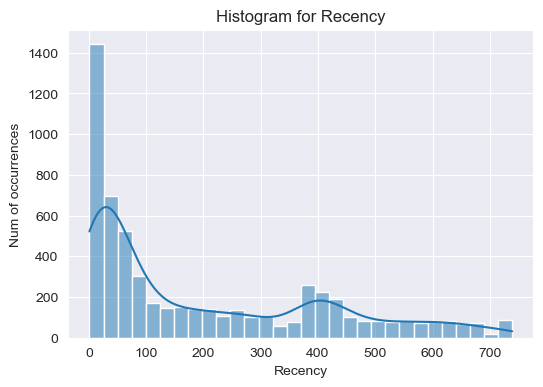

In [76]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm, x='Recency', bins=30, kde=True)
plt.title('Histogram for Recency')
plt.xlabel('Recency')
plt.ylabel('Num of occurrences')
plt.show()

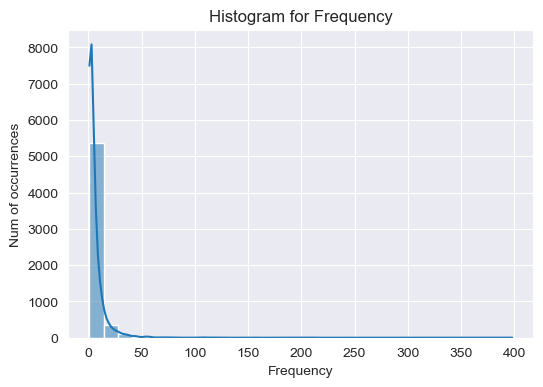

In [77]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm, x='Frequency', bins=30, kde=True)
plt.title('Histogram for Frequency')
plt.xlabel('Frequency')
plt.ylabel('Num of occurrences')
plt.show()

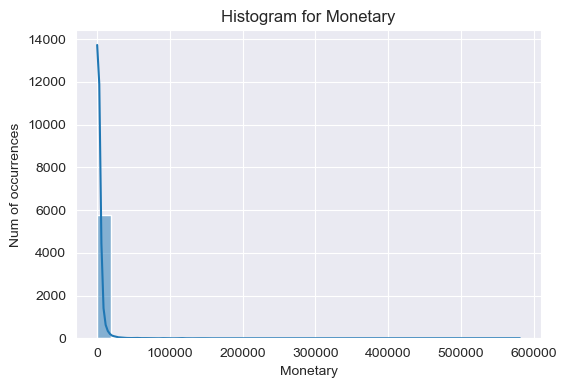

In [78]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm, x='Monetary', bins=30, kde=True)
plt.title('Histogram for Monetary')
plt.xlabel('Monetary')
plt.ylabel('Num of occurrences')
plt.show()

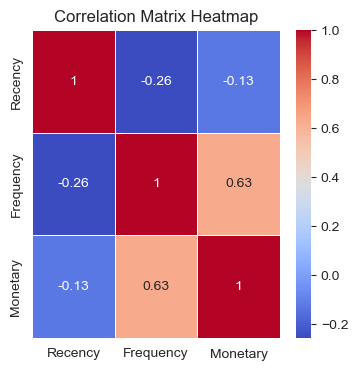

In [79]:
corr_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

There is a moderate correlation between Frequency and Monetary. This correlation is expected, as customers tend to spend more when they make purchases more frequently.

### Box Plots

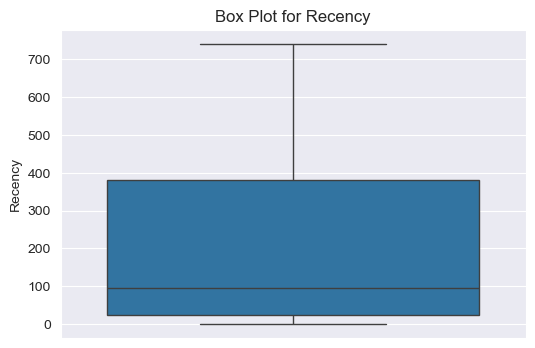

In [80]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = rfm, y='Recency')
plt.title('Box Plot for Recency')
plt.ylabel('Recency')
plt.show()

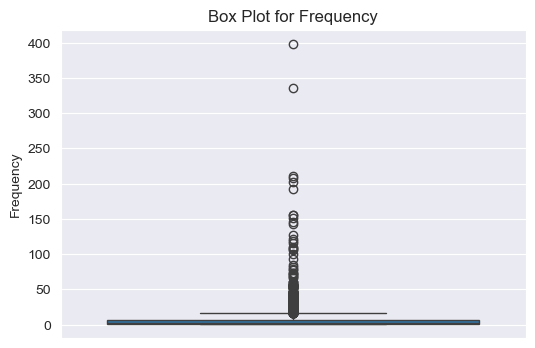

In [81]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = rfm, y='Frequency')
plt.title('Box Plot for Frequency')
plt.ylabel('Frequency')
plt.show()

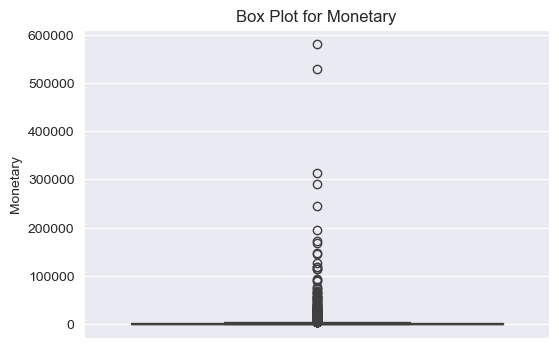

In [82]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = rfm, y='Monetary')
plt.title('Box Plot for Monetary')
plt.ylabel('Monetary')
plt.show()

Recency, Frequency, and Monetary features have a lot of outliers. The outliers may make segmentation process more difficult.

## 4. **Modeling**
   - **Assigning RFM Scores**: Assign scores to each RFM metric to categorize customers.
   - **RFM Segmentation**: Segment customers based on their RFM scores.
   - **K-Means Clustering**
     - **Log Transformation**: Apply log transformation to stabilize variance.
     - **Standardizing Data**: Normalize the data for clustering.
     - **Elbow Method**: Determine the optimal number of clusters using the elbow method.
     - **Silhouette Score**: Validate the clustering model using the silhouette score.
     - **Model with 4 Clusters**: Implement the K-Means model with 4 clusters.

## Assigning RFM Scores

There are multiple approaches for RFM segmentation. 
I will use the RFM framework with assignment of scores from 1 to 3 for each (Recency, Frequency, Monetary). 3 is the best/highest value, and 1 is the lowest/worst value. 

A final RFM score is calculated simply by combining individual RFM score numbers.  
The RFM segments will be defined using the below table   

| Segment name | RFM score breakouts | Description |
|------------|--------------------------------------|-------------|
| Champions  | 333, 332, 323                       | The best customers  |
| Loyal      | 321, 322, 331, 232, 233               | Valuable customers that are engaged |
| Recent     | 312, 313, 311, 222, 223               | Recent customers  |
| Needs attention | 213, 221, 123, 132, 133          | A valuable customer that has not purchased recently |
| At risk    | 231, 212, 122, 131, 211               | A customer that has not purchased recently and/or tends to spend less overall |
| Inactive   | 111, 112, 113, 121                   | A lapsed customer  |

In [90]:
rfm["Recency_Score"]  = pd.qcut(rfm['Recency'], 3, [3, 2, 1])
rfm["Frequency_Score"]  = pd.qcut(rfm['Frequency'].rank(method="first"), 3, [1, 2, 3])
rfm["Monetary_Score"]  = pd.qcut(rfm['Monetary'], 3, [1, 2, 3])
rfm["RFM_Score"] = rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str) + rfm["Monetary_Score"].astype(str)
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,12,77556.46,1,3,3,133
12347.0,3,8,4921.53,3,3,3,333
12348.0,76,5,2019.40,2,2,3,223
12349.0,19,4,4428.69,3,2,3,323
12350.0,311,1,334.40,1,1,1,111


### RFM Segmentation

In [91]:
def segment_customers(rfm_score):
    if rfm_score in ['333', '332', '323']:
        return 'Champions'
    elif rfm_score in ['321', '322', '331', '232', '233']:
        return 'Loyal'
    elif rfm_score in ['312', '313', '311', '222', '223']:
        return 'Recent'
    elif rfm_score in ['213', '221', '123', '132', '133']:
        return 'Needs attention'
    elif rfm_score in ['231', '212', '122', '131', '211']:
        return 'At risk'
    elif rfm_score in ['111', '112', '113', '121']:
        return 'Inactive'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customers)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          5878 non-null   int64   
 1   Frequency        5878 non-null   int64   
 2   Monetary         5878 non-null   float64 
 3   Recency_Score    5878 non-null   category
 4   Frequency_Score  5878 non-null   category
 5   Monetary_Score   5878 non-null   category
 6   RFM_Score        5878 non-null   object  
 7   Segment          5878 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 422.2+ KB


In [92]:
rfm.reset_index(inplace=True)
rfm.groupby('Segment').agg({'CustomerID':'count'})

,CustomerID
Segment,
At risk,876
Champions,1243
Inactive,1371
Loyal,1125
Needs attention,421
Recent,842


### Analysis of Segments

In [95]:
rfm_stats = rfm[['Recency','Frequency','Monetary','Segment']].groupby('Segment').agg({'mean','std','max','min'})
format_rules = {
    ('Recency', 'mean'): '{:.2f}',
    ('Recency', 'std'): '{:.2f}',
    ('Recency', 'max'): '{:.0f}',
    ('Recency', 'min'): '{:.0f}',
    ('Monetary', 'mean'): '${:,.2f}',
    ('Monetary', 'std'): '${:,.2f}',
    ('Monetary', 'max'): '${:,.0f}',
    ('Monetary', 'min'): '${:,.0f}',
    ('Frequency', 'mean'): '{:.2f}',
    ('Frequency', 'std'): '{:.2f}',
    ('Frequency', 'max'): '{:.0f}',
    ('Frequency', 'min'): '{:.0f}',
}
table_styles = [
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.2em;'}
]

rfm_stats_style = rfm_stats.style.format(format_rules)
rfm_stats_style = rfm_stats_style.set_table_styles(table_styles)
rfm_stats_style = rfm_stats_style.set_table_styles(
    {('Monetary', 'std'): [{'selector': 'th', 'props': 'border-left: 1px solid black'},
                           {'selector': 'td', 'props': 'border-left: 1px solid black'}
                           ],
     ('Frequency', 'std'): [{'selector': 'th', 'props': 'border-left: 1px solid black'},
                            {'selector': 'td', 'props': 'border-left: 1px solid black'}
                            ]
     },
    overwrite = False,
    axis=0)
rfm_stats_style

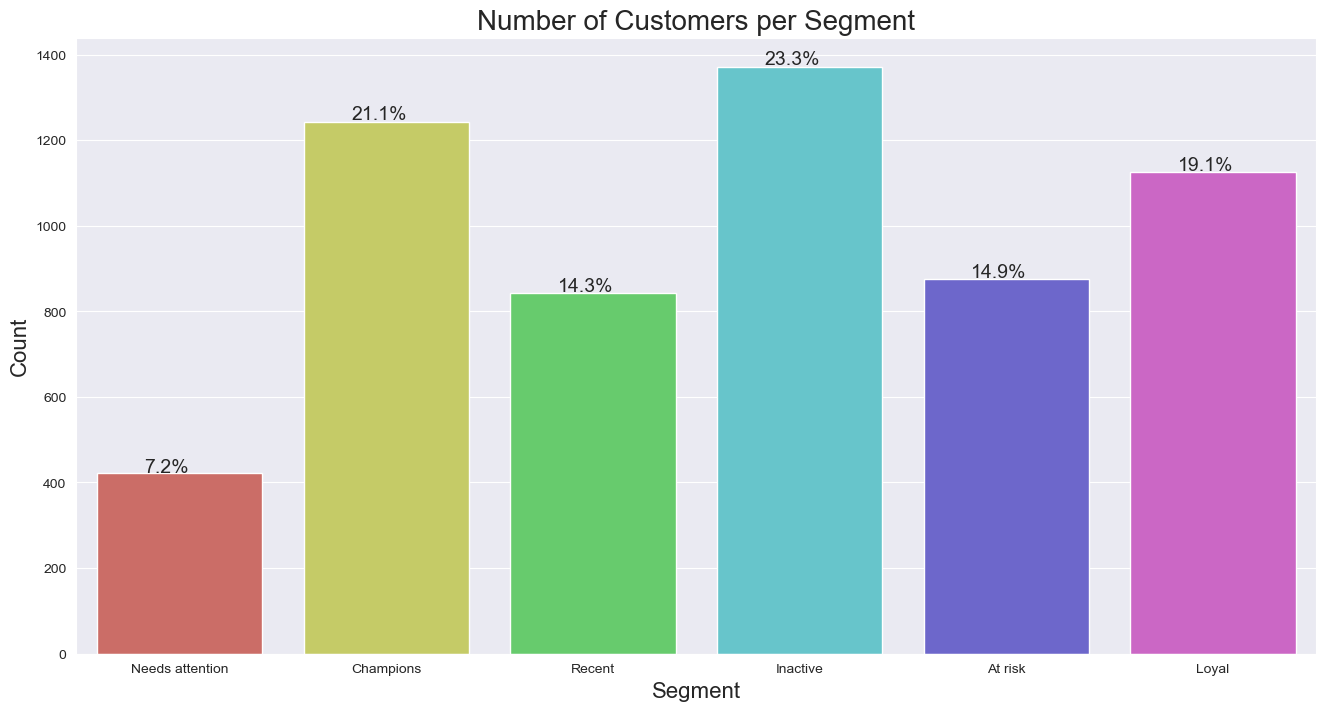

In [96]:
# Number of Customers per Segment

plt.figure(figsize = (16, 8))
ax = sns.countplot(data = rfm,
                   x = 'Segment',
                   palette = 'hls')
total = len(rfm.Segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers per Segment', size = 20)
plt.xlabel('Segment', size = 16)
plt.ylabel('Count', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

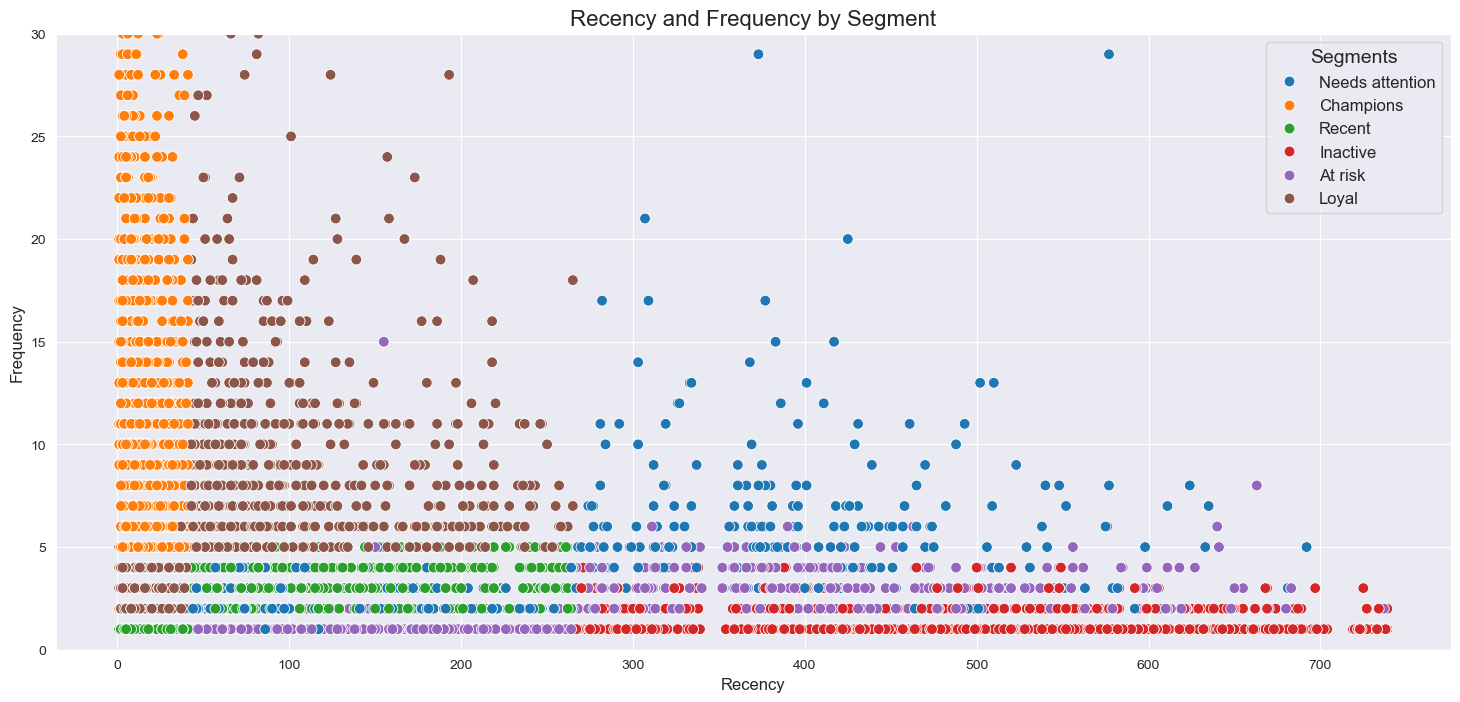

In [97]:
# Recency and Frequency by Segment

plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="Recency", y="Frequency", hue="Segment", palette='tab10', s=60
)
plt.title("Recency and Frequency by Segment", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.ylim(0, 30)  #the axis needs limiting because of the high number of outliers
plt.show()

- Some 'At risk' and 'Inactive' customers are mixed together

- Some 'Recent', 'Needs attention' and 'At risk' customers are mixed together

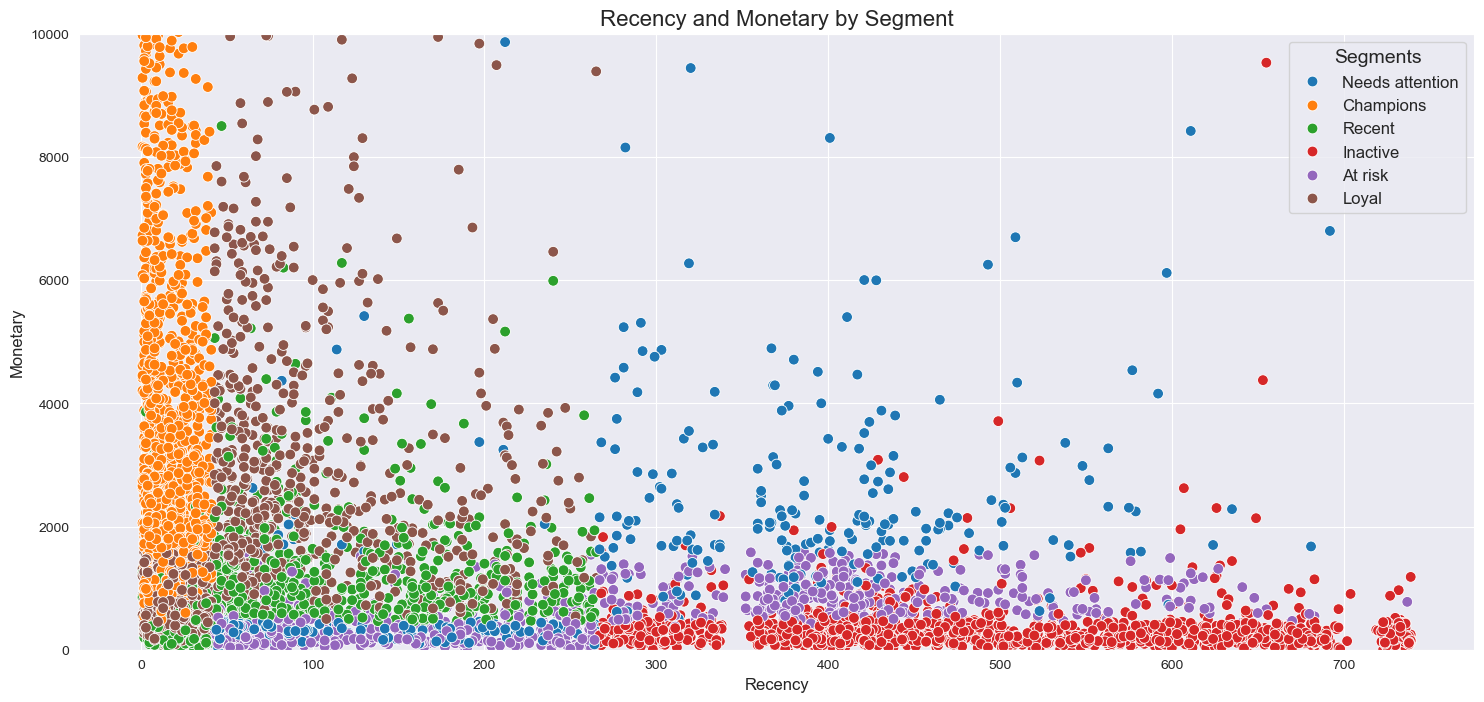

In [98]:
# Recency and Monetary by Segment
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="Recency", y="Monetary", hue="Segment", palette='tab10', s=60
)
plt.title("Recency and Monetary by Segment", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Monetary", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.ylim(0, 10000) # the axis needs limiting because of the high number of outliers
plt.show()

- Some 'At risk' and 'Inactive' customers are mixed together.

- Some 'Recent', 'Needs attention' and 'At risk' customers are mixed together Similar observations were on the Recency and Frequency scatter plot.

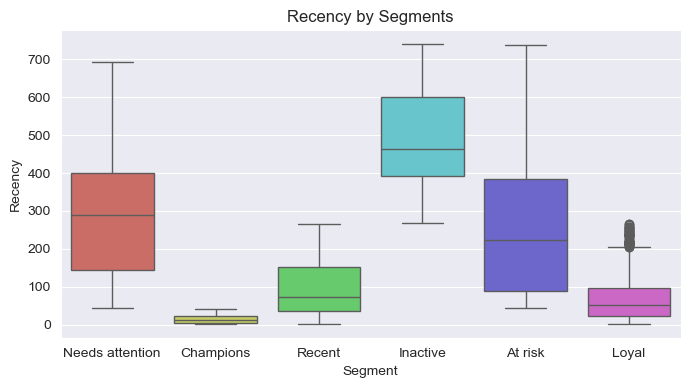

In [99]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Segment', y='Recency', data=rfm, palette='hls')
plt.title('Recency by Segments')
plt.xlabel('Segment')
plt.ylabel('Recency')
plt.show()

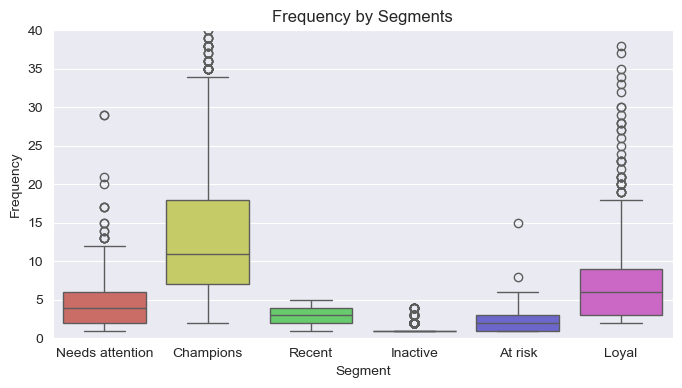

In [102]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Segment', y='Frequency', data=rfm, palette='hls')
plt.title('Frequency by Segments')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.ylim(0, 40)  #the axis needs limiting because of the high number of outliers
plt.show()

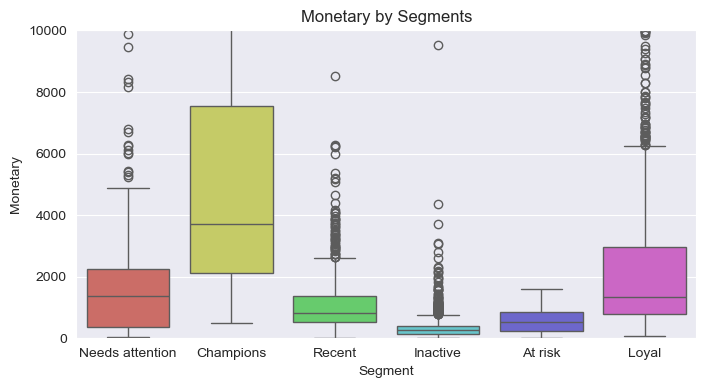

In [103]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Segment', y='Monetary', data=rfm, palette='hls')
plt.title('Monetary by Segments')
plt.xlabel('Segment')
plt.ylabel('Monetary')
plt.ylim(0, 10000) # the axis needs limiting because of the high number of outliers
plt.show()

### 4.3 K-Means Clustering

K-Means clustering is a very common unsupervised learning algorithm. It scales to very large datasets and tends to work well in practice. The K-Means clustering algorithm tries to find the best way of grouping data points into k different groups, where k is a parameter given to the algorithm.
In this section I will use elbow method and silhouette score to determine the optimal number of clusters for Recency, Frequency and Monetary.

In [83]:
cols_for_clustering = ['Recency', 'Frequency', 'Monetary']
rfm_log = rfm.copy()
rfm_log[cols_for_clustering] = rfm[cols_for_clustering].apply(np.log1p)
rfm_log.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,4.473965,1.549588,6.816979
std,1.530915,0.809447,1.385486
min,0.693147,0.693147,1.373716
25%,3.295837,0.693147,5.838546
50%,4.574711,1.386294,6.767044
75%,5.942799,2.079442,7.718377
max,6.606650,5.988961,13.272485


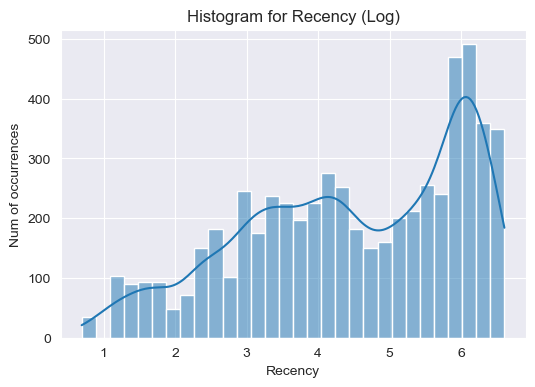

In [84]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm_log, x='Recency', bins=30, kde=True)
plt.title('Histogram for Recency (Log)')
plt.xlabel('Recency')
plt.ylabel('Num of occurrences')
plt.show()

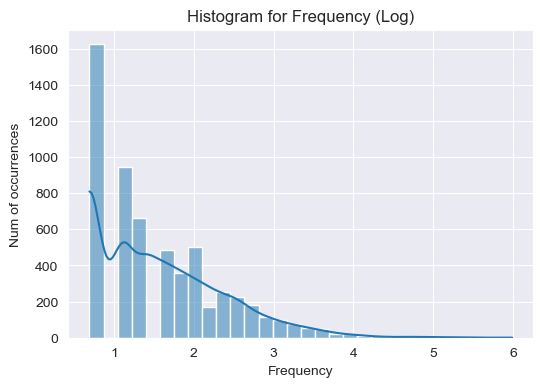

In [85]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm_log, x='Frequency', bins=30, kde=True)
plt.title('Histogram for Frequency (Log)')
plt.xlabel('Frequency')
plt.ylabel('Num of occurrences')
plt.show()

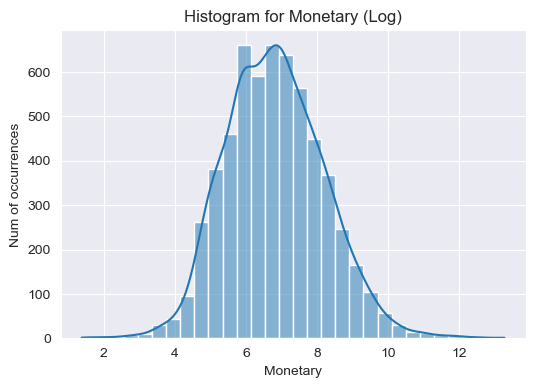

In [86]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm_log, x='Monetary', bins=30, kde=True)
plt.title('Histogram for Monetary (Log)')
plt.xlabel('Monetary')
plt.ylabel('Num of occurrences')
plt.show()

### Standardising Data

K-Means clustering relies on distances between data points to assign them to clusters. If features have different scales, the algorithm may give more weight to features with larger scales, leading to biased cluster assignments. RobustScaler scales the data based on the interquartile range (IQR) to handle outliers. Recency, Frequency and Monetary features have many outliers therefore RobustScaler may be a good choice.

In [87]:
scaler = RobustScaler()
rfm_scaled = rfm_log.copy()
rfm_scaled[cols_for_clustering] = scaler.fit_transform(rfm_log[cols_for_clustering])
rfm_scaled[cols_for_clustering].describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5.878000e+03
mean,-0.038061,0.117791,2.656360e-02
std,0.578367,0.583893,7.370275e-01
min,-1.466422,-0.500000,-2.869051e+00
25%,-0.483148,-0.500000,-4.939261e-01
50%,0.000000,0.000000,2.362477e-16
75%,0.516852,0.500000,5.060739e-01
max,0.767649,3.320122,3.460654e+00


### Elbow Method

The elbow method is a technique that helps to determine the optimal number of clusters (K) for K-means clustering algorithm.

In [88]:
X = rfm_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

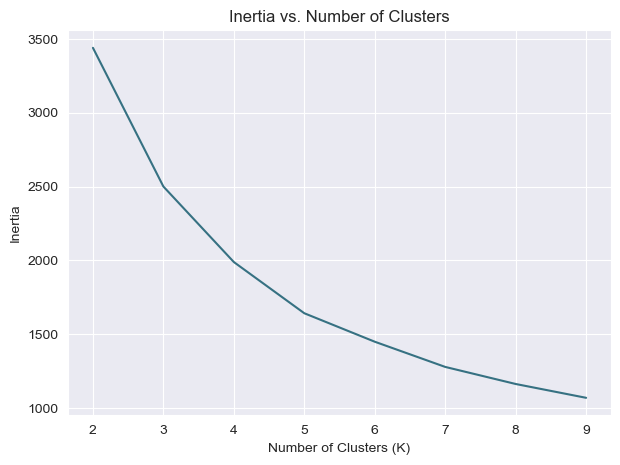

In [89]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

There is no clear elbow on the chart. 5 or 6 clusters may be a good number of clusters.

Silhouette Score

- Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

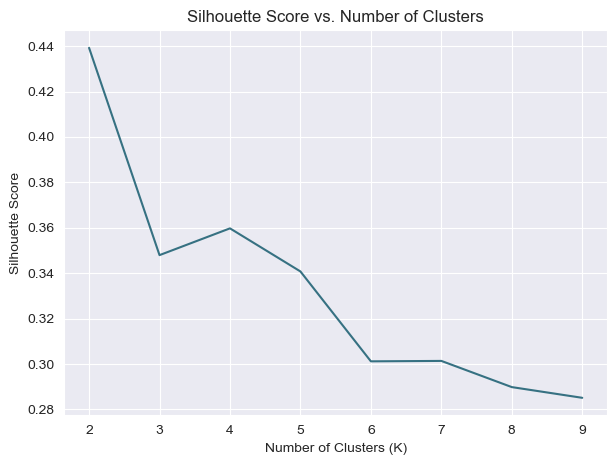

In [104]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The highest Silhouette score is for 2 clusters. 4 clusters seem to be a good enough choice.

Model with 4 Clusters

In [109]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(rfm_scaled[cols_for_clustering])
rfm_scaled['Cluster'] = model.predict(rfm_scaled[cols_for_clustering])
rfm['Cluster'] = rfm_scaled.Cluster

Evaluating Clusters